In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

### Reading and describing the data values

In [2]:
df= pd.read_csv("D:\Datasets\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No missing values

### Understanding the data

In [7]:
col = ["age", "1: male, 0: female", "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic", "resting blood pressure", "serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl", "resting electrocardiographic results (values 0,1,2)", " maximum heart rate achieved", "exercise induced angina", "oldpeak = ST depression induced by exercise relative to rest", "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy", "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(col)):
    print(df.columns[i]+":\t\t"+col[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

In [9]:
df.corr()['target'].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

<AxesSubplot:>

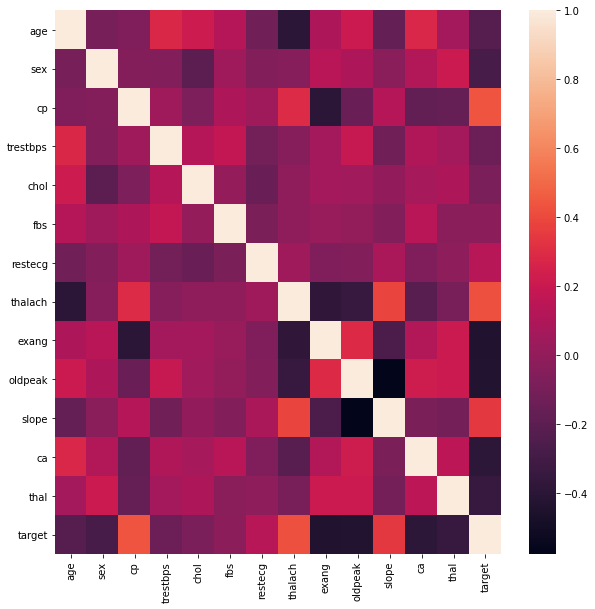

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

## Exploratory Data Analysis

#### Analyzing the target variable and checking if the data is not skewed

<AxesSubplot:xlabel='target', ylabel='count'>

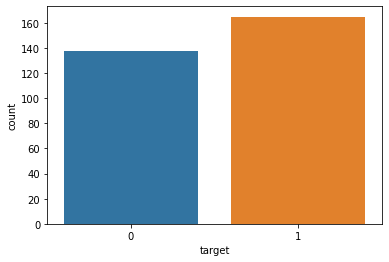

In [11]:
y= df['target']
sns.countplot(y)

In [12]:
# The two classes are not exactly equal but close enough to not increase the data columns

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

#### percentage without heart problem and percentage with heart problem

In [14]:
print('Percentage of patients without heart disease problem :', round(df[y==0].target.count()/y.count()*100,2))
print('Percentage of patients with heart disease problem :', round(df[y==1].target.count()/y.count()*100,2))

Percentage of patients without heart disease problem : 45.54
Percentage of patients with heart disease problem : 54.46


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

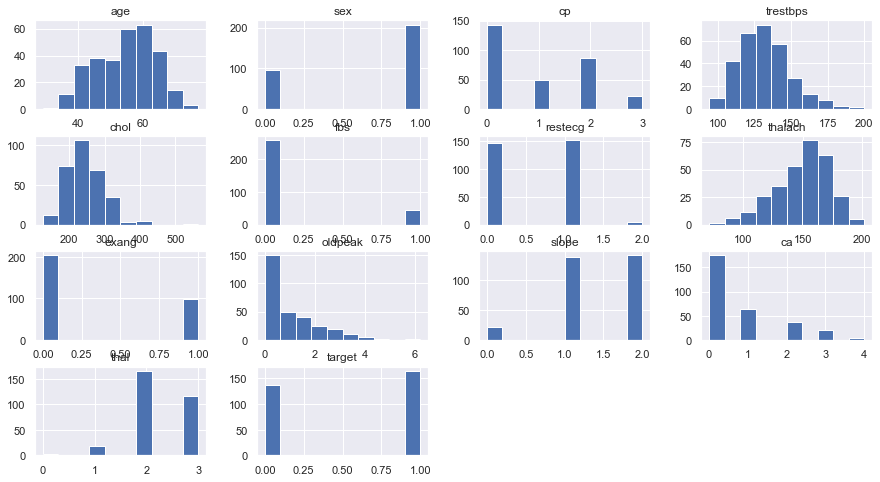

In [15]:
sns.set(rc={'figure.figsize':(15,8)})
df.hist()

### Data Processing

In [16]:
# Firstly we will convert the categorical variables to dummy columns so that we can go on with the algorithm

In [17]:
cat_columns= ['sex' ,'cp','fbs','restecg','exang','slope','ca','thal']
df= pd.get_dummies(df,columns= cat_columns)

In [18]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
# We now scale the other columns using Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scale_col=['age','trestbps','chol','thalach','oldpeak']
df[scale_col]=sc.fit_transform(df[scale_col])

In [21]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### spliting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split
X= df.drop('target', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=2, test_size= 0.2)

In [23]:
print('The shape oof X train dataset is', X_train.shape)
print('The shape oof X test dataset is', X_test.shape)
print('The shape oof y train dataset is', y_train.shape)
print('The shape oof y test dataset is', y_test.shape)

The shape oof X train dataset is (242, 30)
The shape oof X test dataset is (61, 30)
The shape oof y train dataset is (242,)
The shape oof y test dataset is (61,)


### Machine Learning Algorithms

### 1) Navie Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nv= GaussianNB()
nv.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred_nv = nv.predict(X_test)
y_pred_nv

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
score_nv= (accuracy_score(y_test, y_pred_nv))*100
score_nv

83.60655737704919

<AxesSubplot:>

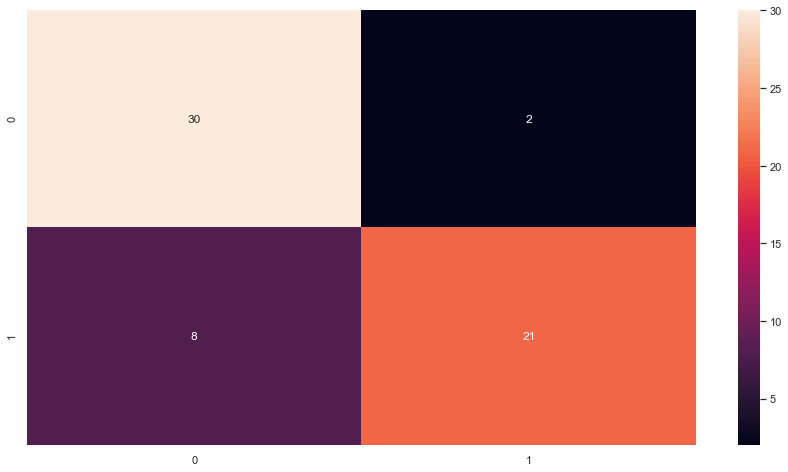

In [27]:
matrix_nv= confusion_matrix(y_test, y_pred_nv)
sns.heatmap(matrix_nv,annot = True, fmt = "d")

 #### This shows that Navie Bayes gives an accuracy of approx 83.6%

### 2) Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
score_lr= (accuracy_score(y_test, y_pred_lr))*100
score_lr

93.44262295081968

<AxesSubplot:>

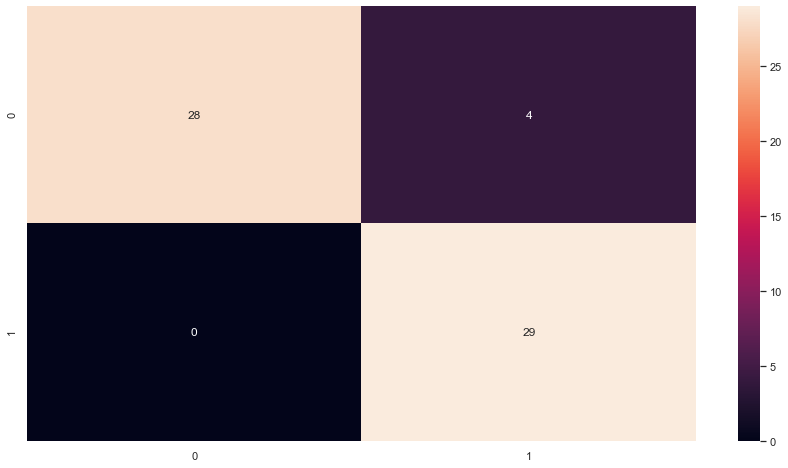

In [31]:
matrix_lr= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr,annot = True, fmt = "d")

#### This shows that Logistic Regression gives an accuracy of approx 93.44%

### 3) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='entropy', max_depth=4)  #max depth stops the classification after the given number so as to not increase the computer memory and make system work slower
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
y_pred_dt = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



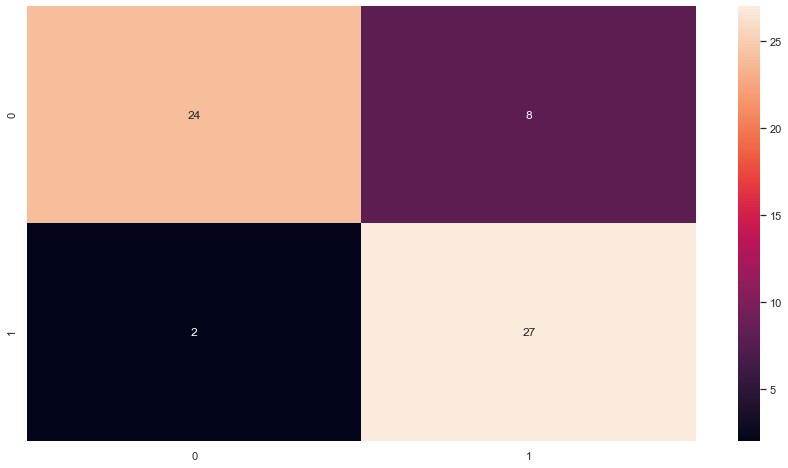

In [34]:
matrix_dt=confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix_dt,annot = True, fmt = "d")
print(classification_report(y_test, y_pred_dt))

In [35]:
score_dt = (accuracy_score(y_test, y_pred_dt))*100
score_dt

83.60655737704919

####  This shows that Decision Tree gives an accuracy of approx 84%

### 4) Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc= RandomForestClassifier(n_estimators=100)
# We will use GridSearchCV to find the optimal parameters for RFC
parameters= {
    'n_estimators':[25,50,75,100,125,150,175,200],
    'max_depth':[1,3,5,7],
}
c= GridSearchCV(rfc, parameters)  
c.fit(X_train, np.ravel(y_train))
def display(results):
    print('best params are: ', results.best_params_)
display(c)    

best params are:  {'max_depth': 7, 'n_estimators': 125}


In [48]:
rfc= RandomForestClassifier(n_estimators= 125, max_depth=7)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



<AxesSubplot:>

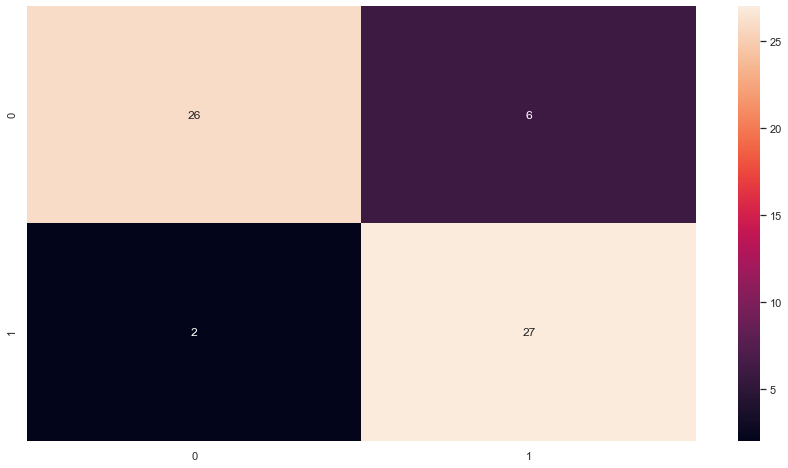

In [49]:
matrix_rfc= confusion_matrix(y_test, y_pred_rfc)
print(classification_report(y_test, y_pred_rfc))
sns.heatmap(matrix_rfc,annot = True, fmt = "d")

In [50]:
score_rfc= (accuracy_score(y_test, y_pred_rfc))*100
score_rfc

86.88524590163934

#### The accuracy score for Random Forest is 90.16%

### 5) Support Vector Machine (SVM) 

In [40]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

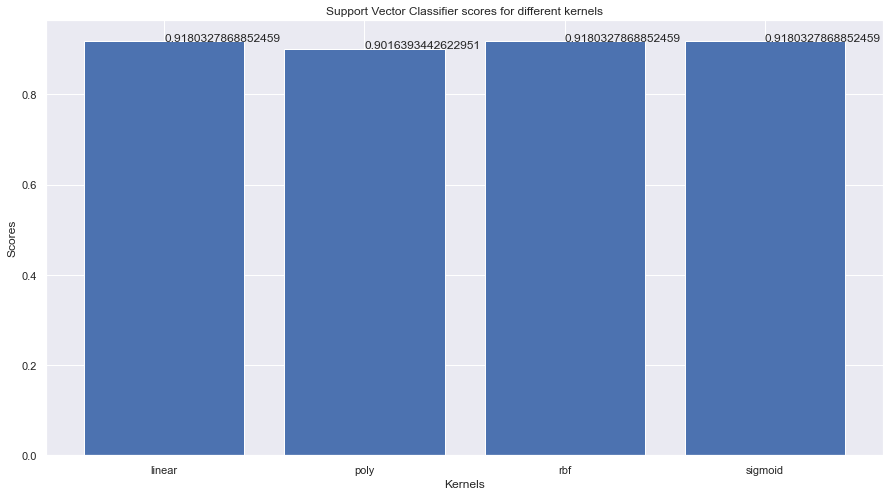

In [41]:
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [42]:
score_svm= (svc_scores[0])*100
score_svm

91.80327868852459

In [43]:
# Since all the kernals show alomost same accuracy, we take the accuracy of linear kernal

#### The accuracy score for  SVM is approx 91.80%

### 6) K Nearest Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

<AxesSubplot:>

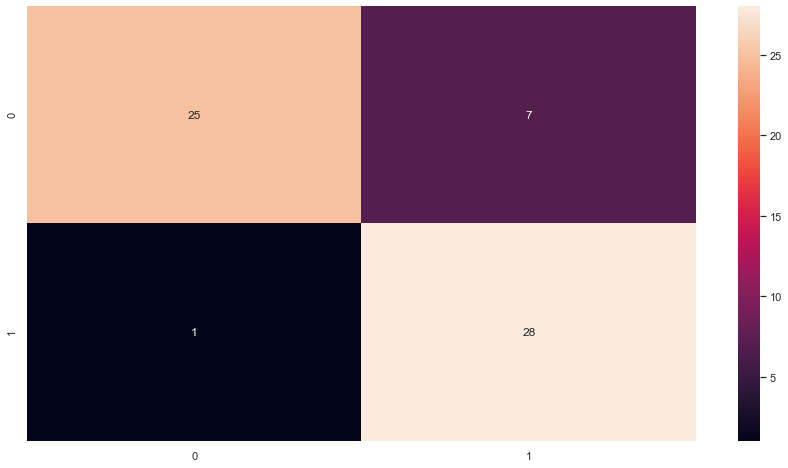

In [45]:
matrix_knn= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix_knn,annot = True, fmt = "d")

In [46]:
score_knn= (accuracy_score(y_test, y_pred_knn))*100
score_knn

86.88524590163934

#### The accuracy score for KNN is 86.88%

### CONCLUSION 

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

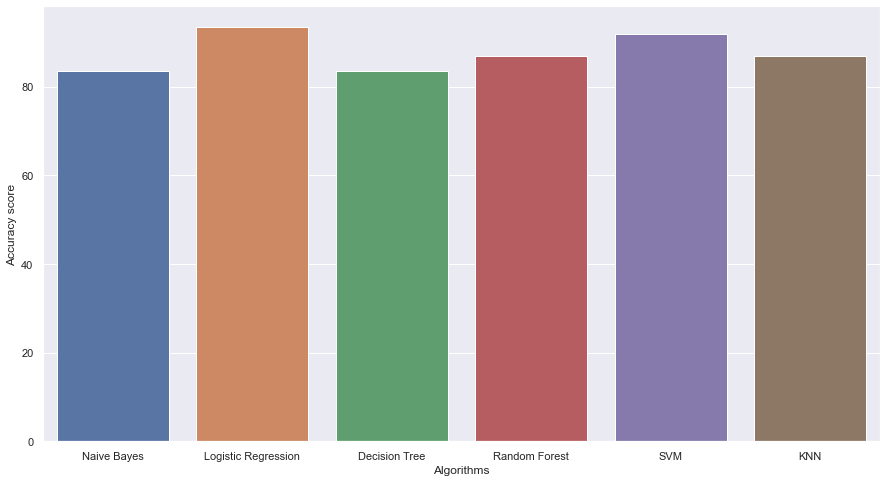

In [47]:
algorithms=['Naive Bayes','Logistic Regression','Decision Tree','Random Forest','SVM','KNN']
scores=[score_nv,score_lr,score_dt,score_rfc,score_svm,score_knn]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

##### After analyzing, scaling and applying different machine learning algorithms to the Heart Disease pred dataset, we get that maximum accuracy is shown by Logistic Regression with an accuracy score of 93%, hence Logistic regression is best algorithm to predict Heart Diseases